In [4]:
import numpy as np
import common_methods as com
import matplotlib.pyplot as plt

In [2]:
nx = 250
ny = 250
nt = 8
dt = 0.003
noise_level = 0
downsample_by = 5
batch_size = 24

In [20]:
nu = 10e-2

dx = 2*np.pi/(nx - 1)
dy = 2*np.pi/(ny - 1)

In [19]:
dx

0.025233675932448137

In [14]:
# Needed for plotting:
x = np.linspace(0, 2*np.pi, num = nx)
y = np.linspace(0, 2*np.pi, num = ny)
X, Y = np.meshgrid(x, y)

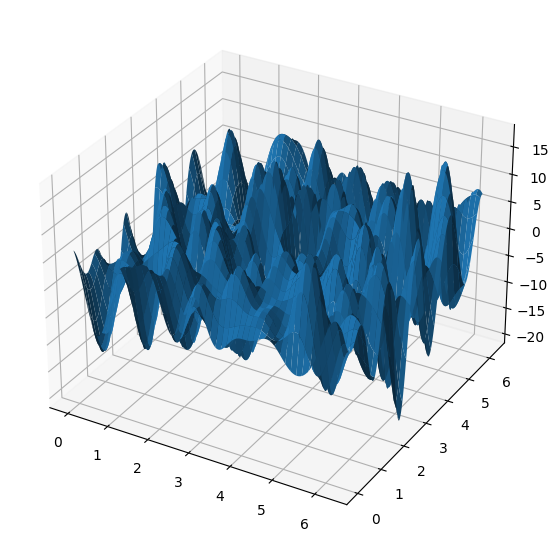

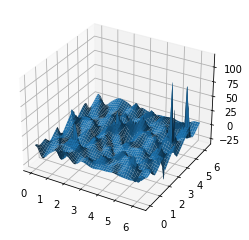

In [24]:
batch = []

for i in range(batch_size):
    ########################### Change the following lines to implement your own data ###########################

    ## Assign initial function:
    u = com.initgen([250,250], freq=4, boundary='Periodic')

    # Plotting the initial function:
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:])
    
    plt.show()

    sample = {}
    sample['u0'] = u

    for n in range(nt - 1):
        un = com.pad_input_2(u, 2)[1:, 1:]  # Same triplet of numbers on each side

        u = (un[1:-1, 1:-1] + dt * (nu*(un[2:, 1:-1] + un[0:-2, 1:-1] - 2*un[1:-1, 1:-1]) / dx**2
                                    - un[1:-1, 1:-1] * (un[2:, 1:-1] - un[1:-1, 1:-1]) / dx))[:-1, :-1]

        sample['u' + str(n+1)] = u



    ## sample should at this point be a dictionary with entries 'u0', ..., 'uL', where L = nt                   ##
    ## For a given j, sample['uj'] is a matrix of size nx x ny containing the function values at time-step dt*j ##
    ##############################################################################################################


    # Plotting the function values from the last layer:
    fig2 = plt.figure()
    ax2 = fig2.gca(projection='3d')
    surf2 = ax2.plot_surface(X, Y, u)
    
    plt.show()

    com.downsample(sample, downsample_by)
    com.addNoise(sample, noise_level, nt)

    batch.append(sample)
    break

In [25]:
sample

{'u0': array([[ 5.43531471,  1.35828805, -3.34555405, ...,  5.20318837,
          7.25420486,  7.52451309],
        [ 3.68687762, -1.14432247, -6.57248543, ...,  1.04347624,
          4.41469793,  5.72053048],
        [ 1.67386711, -3.04004379, -8.66043461, ..., -3.69839106,
          0.35835318,  2.88244369],
        ...,
        [ 2.07598219,  3.58356823,  3.04372305, ..., -3.038485  ,
         -2.87104751, -0.64829593],
        [ 4.75608943,  4.35314489,  2.2708989 , ...,  3.11916578,
          3.10577456,  3.95677962],
        [ 5.94916327,  3.47801958, -0.05478294, ...,  6.2426973 ,
          6.95310201,  7.00974005]]),
 'u1': array([[ 5.59030572,  1.43197665, -3.61773333, ...,  5.54384039,
          7.5042892 ,  7.66169176],
        [ 3.8644442 , -1.19461373, -6.97140527, ...,  1.15575572,
          4.80660884,  6.06652265],
        [ 1.75634935, -3.09905137, -8.84059441, ..., -3.99673049,
          0.41301543,  3.08078215],
        ...,
        [ 1.9087522 ,  3.43434875,  3.0228

In [17]:
un

array([[ 1.8290334 ,  1.21762575,  0.57374806, ...,  1.8290334 ,
         1.21762575,  0.57374806],
       [ 1.00177209,  0.38339621, -0.25607956, ...,  1.00177209,
         0.38339621, -0.25607956],
       [ 0.15177655, -0.47000169, -1.1009071 , ...,  0.15177655,
        -0.47000169, -1.1009071 ],
       ...,
       [ 1.8290334 ,  1.21762575,  0.57374806, ...,  1.8290334 ,
         1.21762575,  0.57374806],
       [ 1.00177209,  0.38339621, -0.25607956, ...,  1.00177209,
         0.38339621, -0.25607956],
       [ 0.15177655, -0.47000169, -1.1009071 , ...,  0.15177655,
        -0.47000169, -1.1009071 ]])